In [12]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

In [2]:
# Ouvrir la base de donnes
df = pd.read_csv('/content/AirPassengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data = df.iloc[:,1].values

In [6]:
data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [64]:
# Preparation de la base de donnees
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data.reshape(-1,1))

In [65]:
# diviser les donnes
X_data = []
y_data = []
for i in range(12,len(data)):
  X_data.append(data[i-12:i,0])
  y_data.append(data[i,0])


In [67]:

#REshaping
X_data = np.array(X_data)
y_data = np.array(y_data)
X_data = np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))


In [34]:

X_data.shape

(143, 0, 1)

In [68]:
#separer les donnes
train_size = int(len(X_data)*0.8)
test_size = len(X_data)-train_size
train_size,test_size
X_train,X_test = X_data[0:train_size],X_data[train_size:len(X_data)]
y_train,y_test = y_data[0:train_size],y_data[train_size:len(X_data)]
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))


105 105
27 27


In [36]:
X_train = X_data[0:train_size,:]
y_train = y_data[0:train_size]

X_test = X_data[train_size:len(X_data),:]
y_test = y_data[train_size:len(X_data)]

In [70]:
# Constru_ction du model
model = Sequential()
model.add(LSTM(4,input_shape=(12,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
105/105 - 3s - 25ms/step - loss: 0.0424
Epoch 2/100
105/105 - 0s - 3ms/step - loss: 0.0137
Epoch 3/100
105/105 - 0s - 3ms/step - loss: 0.0101
Epoch 4/100
105/105 - 0s - 3ms/step - loss: 0.0081
Epoch 5/100
105/105 - 0s - 3ms/step - loss: 0.0073
Epoch 6/100
105/105 - 0s - 3ms/step - loss: 0.0066
Epoch 7/100
105/105 - 0s - 3ms/step - loss: 0.0064
Epoch 8/100
105/105 - 0s - 3ms/step - loss: 0.0061
Epoch 9/100
105/105 - 0s - 3ms/step - loss: 0.0065
Epoch 10/100
105/105 - 0s - 3ms/step - loss: 0.0061
Epoch 11/100
105/105 - 0s - 3ms/step - loss: 0.0061
Epoch 12/100
105/105 - 0s - 3ms/step - loss: 0.0059
Epoch 13/100
105/105 - 0s - 3ms/step - loss: 0.0059
Epoch 14/100
105/105 - 0s - 3ms/step - loss: 0.0059
Epoch 15/100
105/105 - 0s - 3ms/step - loss: 0.0057
Epoch 16/100
105/105 - 0s - 3ms/step - loss: 0.0061
Epoch 17/100
105/105 - 0s - 3ms/step - loss: 0.0057
Epoch 18/100
105/105 - 0s - 3ms/step - loss: 0.0058
Epoch 19/100
105/105 - 0s - 3ms/step - loss: 0.0058
Epoch 20/100
105/105

In [71]:
# Evaluer le model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Train RMSE: 0.04 RMSE
Test RMSE: 0.14 RMSE


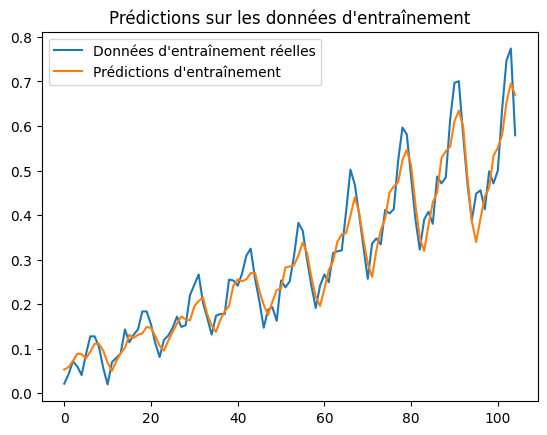

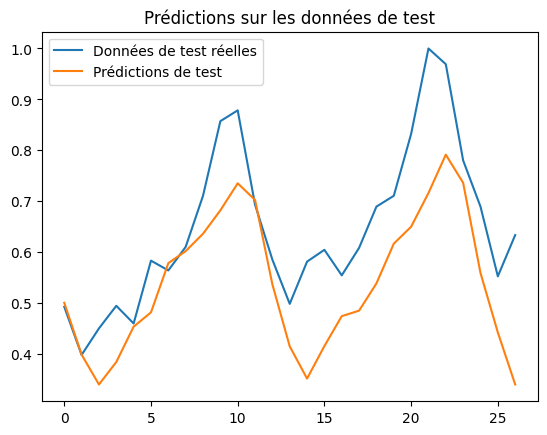

In [73]:
# prompt: visualiser les resultat

# Inverser la mise à l'échelle pour obtenir les prédictions réelles
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculer l'erreur quadratique moyenne (RMSE)
print('Train RMSE: %.2f RMSE' % (np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))))
print('Test RMSE: %.2f RMSE' % (np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))))


# Tracer les résultats
plt.plot(y_train[0], label='Données d\'entraînement réelles')
plt.plot(train_predict[:,0], label='Prédictions d\'entraînement')
plt.legend(loc='best')
plt.title('Prédictions sur les données d\'entraînement')
plt.show()

plt.plot(y_test[0], label='Données de test réelles')
plt.plot(test_predict[:,0], label='Prédictions de test')
plt.legend(loc='best')
plt.title('Prédictions sur les données de test')
plt.show()